<a href="https://colab.research.google.com/github/majesticio/Box_Office_Predictions/blob/master/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Query

*Using SQL to investigate big data*

---
by **Gabriel Fosse**

##Problem Definition
What can we find out about Hacker News using SQL and Big Query?


*   What information is within this data?
*   How many unique authors are there?
*   How many articles does does this database have?
*   How many records are there?
*   How many article titles start with 'D' and end with an 's'?
*   How many titles start with a 'T' or a 'G'
*   Show authors in alphabetical order


##Import Libraries

In [83]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import plotly.express as px


##Authenticate credentials and project ID

Enter your project ID from GCP

In [84]:
project_id = 'chainlink-285504'

Provide credentials

In [85]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


###Client object

Create a Client object

In [86]:
client = bigquery.Client(project=project_id)

##Data Collection

Retrieve our data => hacker_news

project => bigquery-public-data

In [87]:
dataset_ref = client.dataset('hacker_news', project = 'bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

#get the tables
tables = list(client.list_tables(dataset))

#print table name
print([table.table_id for table in tables])


['comments', 'full', 'full_201510', 'stories']


Above shows column names from our dataset.

##Explore Tables

Lets investigate the 'stories' column

In [88]:
table_ref = dataset.table('stories')
table = client.get_table(table_ref)

table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', 'Unique story ID', ()),
 SchemaField('by', 'STRING', 'NULLABLE', 'Username of submitter', ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('time_ts', 'TIMESTAMP', 'NULLABLE', 'Human readable time in UTC (format: YYYY-MM-DD hh:mm:ss)', ()),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story text', ()),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story descendants', ()),
 SchemaField('author', 'STRING', 'NULLABLE', 'Username of author', ())]

Above are characteristics of the 'stories' feature

In [89]:
client.list_rows(table, max_results=5).to_dataframe()

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6940813,sarath237,0,1387536270,2013-12-20 10:44:30+00:00,Sheryl Brindo Hot Pics,http://www.youtube.com/watch?v=ym1cyxneB0Y,Sheryl Brindo Hot Pics,None,True,NaN,sarath237
1,6991401,123123321321,0,1388508751,2013-12-31 16:52:31+00:00,Are you people also put off by the culture of ...,,They&#x27;re pretty explicitly &#x27;startup f...,None,True,NaN,123123321321
2,1531556,ssn,0,1279617234,2010-07-20 09:13:54+00:00,New UI for Google Image Search,http://googlesystem.blogspot.com/2010/07/googl...,Again following on Bing's lead.,None,None,0.0,ssn
3,5012398,hoju,0,1357387877,2013-01-05 12:11:17+00:00,Historic website screenshots,http://webscraping.com/blog/Generate-website-s...,Python script to generate historic screenshots...,None,None,0.0,hoju
4,7214182,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0.0,kogir


We can see the attributes from 'stories' have been broken out into their own features in the table above

In [90]:
type(client)

google.cloud.bigquery.client.Client

##What's in this data?


Explore the different tables...

###Stories

Data from the stories table

In [91]:
query = """
        SELECT *
        FROM `bigquery-public-data.hacker_news.stories`
        LIMIT 5
        """
df = client.query(query).to_dataframe()
df.head(5)

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6616287,None,None,1382760285,2013-10-26 04:04:45+00:00,None,None,None,True,None,None,None
1,8387564,None,None,1412074988,2014-09-30 11:03:08+00:00,None,None,None,True,None,None,None
2,5500207,None,None,1365187157,2013-04-05 18:39:17+00:00,None,None,None,True,None,None,None
3,6025822,None,None,1373548676,2013-07-11 13:17:56+00:00,None,None,None,True,None,None,None
4,5371837,None,None,1363217360,2013-03-13 23:29:20+00:00,None,None,None,True,None,None,None


That was the first 5. Lets look at the next 5

In [92]:
query = """
        SELECT *
        FROM `bigquery-public-data.hacker_news.stories`
        LIMIT 5 OFFSET 5
        """
df = client.query(query).to_dataframe()
df.head(5)

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,4689683,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0,kogir
1,4712731,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0,kogir
2,3067098,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0,kogir
3,4724746,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0,kogir
4,1253117,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0,kogir


Look at just the text, author, and title columns from stories table

In [93]:
query = """
        SELECT text, author, title
        FROM `bigquery-public-data.hacker_news.stories`
        LIMIT 5 OFFSET 5
        """
df = client.query(query).to_dataframe()
df.head(5)

,text,author,title
0,Mind the gap.,kogir,Placeholder
1,Mind the gap.,kogir,Placeholder
2,Mind the gap.,kogir,Placeholder
3,Mind the gap.,kogir,Placeholder
4,Mind the gap.,kogir,Placeholder


###Comments

Data from the comments table

In [94]:
query = """
        SELECT *
        FROM `bigquery-public-data.hacker_news.comments`
        LIMIT 5
        """
df = client.query(query).to_dataframe()
df.head(2)

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,9462226,13,13,1430346041,2015-04-29 22:20:41+00:00,Then why the hell are you advertising it as &q...,9461692,None,None,0
1,10020929,13,13,1438921413,2015-08-07 04:23:33+00:00,I think you put far too much trust in one of t...,10020857,None,None,0


###Full

Data from the 'full' table

In [95]:
query = """
        SELECT *
        FROM `bigquery-public-data.hacker_news.full`
        LIMIT 5
        """
df = client.query(query).to_dataframe()
df.head(2)

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,Kill-switch to me sounds like something presse...,None,happywolf,NaN,1443194129,2015-09-25 15:15:29+00:00,comment,10278617,10277380.0,None,None,None
1,None,None,It also includes every person who lives in a c...,None,twoandfifteen,NaN,1558153775,2019-05-18 04:29:35+00:00,comment,19945617,19944745.0,None,None,None


###full_201510

In [96]:
query = """
        SELECT *
        FROM `bigquery-public-data.hacker_news.full_201510`
        LIMIT 5
        """
df = client.query(query).to_dataframe()
df.head(2)

,by,score,time,title,type,url,text,parent,deleted,dead,descendants,id,ranking
0,nkoren,None,1438618077,None,comment,None,Thank you!!!,9995480,None,None,None,9997122,None
1,mjackson,None,1438618257,None,comment,None,&gt; The centralization of information also wo...,9994653,None,None,None,9997162,None


##How many unique authors are there?

In [97]:
query = """
        SELECT DISTINCT author
        FROM `bigquery-public-data.hacker_news.stories`
        WHERE title IS NOT NULL
        GROUP BY author
        """
df = client.query(query).to_dataframe()
df.head(5)

,author
0,cflick
1,alikamp
2,jeassonlens
3,annawright010
4,limpeseunomebvw


In [98]:
df.count()

author    210368
dtype: int64

There appears to be 210,368 unique authors.

In [99]:
authors = df['author'].to_list()
#print(authors)
print("There are %d authors" % len(authors))

There are 210368 authors


##How many articles does this database have?


In [100]:
query = """
        SELECT DISTINCT title
        FROM `bigquery-public-data.hacker_news.stories`
        WHERE title IS NOT NULL
        """
df = client.query(query).to_dataframe()

In [101]:
df.count()

title    1751155
dtype: int64

There appears to be 1,751,155 articles.

##How many records are there?

In [102]:
query = """
        SELECT COUNT(*)
        FROM `bigquery-public-data.hacker_news.stories`
        """
df = client.query(query).to_dataframe()


In [103]:
df

,f0_
0,1959809


There are 1,959,809 records.

##How many article titles start with 'D' and end with an 's'?

In [104]:
query = """
        SELECT DISTINCT title
        FROM `bigquery-public-data.hacker_news.stories`
        WHERE title LIKE 'D%' AND title LIKE '%s'
        """
df = client.query(query).to_dataframe()
df.head(6)

,title
0,Directory of Directories
1,Disqus security hole links racist comments to ...
2,Dog eats too many cookies
3,Dubai Indian Escorts
4,Dtrace progress
5,Decoding CAPTCHAs


In [105]:
df.shape

(11457, 1)

11,457 titles.

##How many titles start with a 'T' or a 'G'?

In [106]:
query = """
        SELECT DISTINCT title AS Article
        FROM `bigquery-public-data.hacker_news.stories`
        WHERE title LIKE 'T%' OR title LIKE '%G'
        """
df = client.query(query).to_dataframe()
df.head(6)

,Article
0,Tesrrr
1,Tacx Turbo Trainers
2,"The Antikythera Mechanism, The Worlds Oldest K..."
3,This guy just found out how to bypass adblocker
4,The first Copa America trophy that goes to
5,The future of the Desktop in Windows 9: What c...


In [107]:
df.tail()

,Article
175770,Lossy PNG
175771,The effect of typefaces on credibility
175772,"The Rise of ""Logical Punctuation""."
175773,The Merge Button
175774,The new 501(c)(3) and the future of free softw...


In [108]:
df.shape

(175775, 1)

175,775 titles start with a 'T' OR a 'G'.

##Show authors in alphabetical order

In [109]:
query = """
        SELECT DISTINCT author
        FROM `bigquery-public-data.hacker_news.stories`
        WHERE title IS NOT NULL
        ORDER BY author 
        """
df = client.query(query).to_dataframe()
df.head(5)

,author
0,0-o
1,0000000000
2,000000swan
3,00001212
4,0003


In [110]:
df.tail()

,author
210363,zzzviad
210364,zzzxxx
210365,zzzzhe
210366,zzzzz_
210367,zzzzzzzzz


##What dates does this cover?

In [132]:
query = """
        SELECT DISTINCT time_ts, title
        FROM `bigquery-public-data.hacker_news.stories`
        ORDER BY time_ts
        """
df = client.query(query).to_dataframe()
df.head()

,time_ts,title
0,NaT,None
1,2006-10-09 18:21:51+00:00,Y Combinator
2,2006-10-09 18:30:28+00:00,A Student's Guide to Startups
3,2006-10-09 18:40:33+00:00,Woz Interview: the early days of Apple
4,2006-10-09 18:47:42+00:00,NYC Developer Dilemma


In [133]:
df.tail()

,time_ts,title
1933810,2015-10-13 08:36:44+00:00,New gTLDs according to Registrants
1933811,2015-10-13 08:39:14+00:00,The biggest risk we can take is to allow ourse...
1933812,2015-10-13 08:41:02+00:00,How a Journalist and a Music Producer Built a ...
1933813,2015-10-13 08:43:48+00:00,The gifts of the world’s most lethal animal
1933814,2015-10-13 08:44:34+00:00,The Software Behind the Large Hadron Collider ...


It goes from October 9th, 2006 to October 13th, 2015.

In [134]:
df['date'] = pd.to_datetime(df['time_ts']).apply(lambda x: x.date())

In [135]:
df.head()

,time_ts,title,date
0,NaT,None,NaT
1,2006-10-09 18:21:51+00:00,Y Combinator,2006-10-09
2,2006-10-09 18:30:28+00:00,A Student's Guide to Startups,2006-10-09
3,2006-10-09 18:40:33+00:00,Woz Interview: the early days of Apple,2006-10-09
4,2006-10-09 18:47:42+00:00,NYC Developer Dilemma,2006-10-09


In [136]:
df.tail()

,time_ts,title,date
1933810,2015-10-13 08:36:44+00:00,New gTLDs according to Registrants,2015-10-13
1933811,2015-10-13 08:39:14+00:00,The biggest risk we can take is to allow ourse...,2015-10-13
1933812,2015-10-13 08:41:02+00:00,How a Journalist and a Music Producer Built a ...,2015-10-13
1933813,2015-10-13 08:43:48+00:00,The gifts of the world’s most lethal animal,2015-10-13
1933814,2015-10-13 08:44:34+00:00,The Software Behind the Large Hadron Collider ...,2015-10-13


In [137]:
type(df['date'].iloc[0])

pandas._libs.tslibs.nattype.NaTType

In [138]:
df.dtypes

time_ts    datetime64[ns, UTC]
title                   object
date                    object
dtype: object

Lets simplify the timestamp column...

In [139]:
df['datetime'] = pd.to_datetime(df['date'])
df.head()

,time_ts,title,date,datetime
0,NaT,None,NaT,NaT
1,2006-10-09 18:21:51+00:00,Y Combinator,2006-10-09,2006-10-09
2,2006-10-09 18:30:28+00:00,A Student's Guide to Startups,2006-10-09,2006-10-09
3,2006-10-09 18:40:33+00:00,Woz Interview: the early days of Apple,2006-10-09,2006-10-09
4,2006-10-09 18:47:42+00:00,NYC Developer Dilemma,2006-10-09,2006-10-09


In [140]:
df.dtypes

time_ts     datetime64[ns, UTC]
title                    object
date                     object
datetime         datetime64[ns]
dtype: object

Lets try pulling a month out of the date

In [141]:
example = df['datetime'].iloc[1]

'example' is now a datetime object

In [142]:
example.month

10

lets make a feature with just the month for each row...

In [143]:
df['month'] = df['datetime'].apply(lambda x: x.month)

And one for the year...

In [144]:
df['year'] = df['datetime'].apply(lambda x: x.year)

In [145]:
df['month'].iloc[50000]

6.0

In [146]:
df.tail()

,time_ts,title,date,datetime,month,year
1933810,2015-10-13 08:36:44+00:00,New gTLDs according to Registrants,2015-10-13,2015-10-13,10.0,2015.0
1933811,2015-10-13 08:39:14+00:00,The biggest risk we can take is to allow ourse...,2015-10-13,2015-10-13,10.0,2015.0
1933812,2015-10-13 08:41:02+00:00,How a Journalist and a Music Producer Built a ...,2015-10-13,2015-10-13,10.0,2015.0
1933813,2015-10-13 08:43:48+00:00,The gifts of the world’s most lethal animal,2015-10-13,2015-10-13,10.0,2015.0
1933814,2015-10-13 08:44:34+00:00,The Software Behind the Large Hadron Collider ...,2015-10-13,2015-10-13,10.0,2015.0


Drop the other date columns

In [147]:
df.drop(['date'], axis = 1, inplace= True)
df.drop(['datetime'], axis = 1, inplace= True)
df.drop(['time_ts'], axis = 1, inplace= True)

df.head()

,title,month,year
0,None,NaN,NaN
1,Y Combinator,10.0,2006.0
2,A Student's Guide to Startups,10.0,2006.0
3,Woz Interview: the early days of Apple,10.0,2006.0
4,NYC Developer Dilemma,10.0,2006.0


##Plot Data

When were most of the articles published?

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



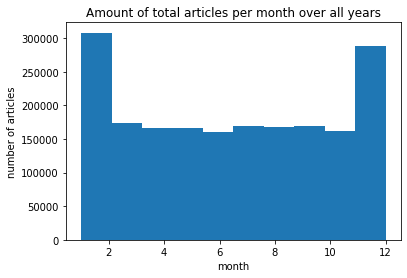

In [148]:
plt.hist(df['month']);
plt.xlabel('month');
plt.ylabel('number of articles');
plt.title('Amount of total articles per month over all years');

Looks like most of the articles were written/published in January or December

What is the total amount of articles year per year?


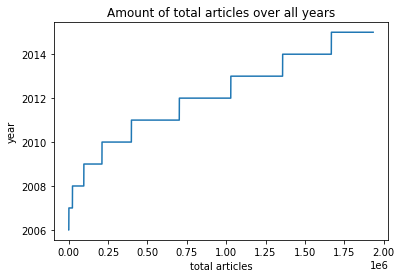

In [154]:
plt.plot(df['year']);
plt.xlabel('total articles');
plt.ylabel('year');
plt.title('Amount of total articles over all years');

##Conclusion

In our dataset:
- There appears to be 210,368 unique authors.
- There appears to be 1,751,155 articles.
- There are 1,959,809 records.
- 11,457 titles that start with 'D' and end with an 's'
- 175,775 titles start with a 'T' OR a 'G'.
- Data goes from October 9th, 2006 to October 13th, 2015.